<a href="https://colab.research.google.com/github/bibhuprasad19/load_Acceptance_or_Reject/blob/master/loan_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we import the necssary libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics,naive_bayes
import numpy as np
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We load the necessary csv file from our google drive *below*

In [ ]:
loan_data=pd.read_csv('/content/drive/My Drive/loan_pred/train_ctrUa4K.csv')
loan_data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
loan_data.shape


(614, 13)

**Pre-processing Data-Data available are generally not perfect and needs some pre-processing before giving it as input to fit the model.The pre-processing part can be perceived as making the vegetables ready by slicing,chopping the before putting it in the pan.
**

we need to check if our data has any missing values or not .

In [ ]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

the below code could be done by using pandas command but i didn't do that as i was learning it the first time and was not aware of how to do it.
# **below here, we handpicked the necessary features for our model **

In [ ]:
modified_data=loan_data[['Dependents','Gender','Married','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Property_Area','Credit_History']]
modified_data.head()

,Dependents,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Credit_History
0,0,Male,No,Graduate,No,5849,0.0,NaN,360.0,Urban,1.0
1,1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,Rural,1.0
2,0,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,Urban,1.0
3,0,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,1.0
4,0,Male,No,Graduate,No,6000,0.0,141.0,360.0,Urban,1.0


Here we wished to to know more about our data and understand the distribution of the various features

In [ ]:
print(modified_data['Gender'].value_counts())
print(modified_data['Married'].value_counts())
print(modified_data['Dependents'].value_counts())
print(modified_data['Education'].value_counts())
print(modified_data['Self_Employed'].value_counts())
print(modified_data['Property_Area'].value_counts())
print(modified_data['Credit_History'].value_counts())
print(modified_data['Loan_Amount_Term'].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


The below code could also be done using fillna command .
 
 We went for a for loop across various features and filled the Nan values with the most frequent value which we obtained from the above code.

In [ ]:
for i in range(len(modified_data['Gender'])):
  if(modified_data['Gender'][i] != 'Male' and modified_data['Gender'][i] !="Female"):
    modified_data['Gender'][i]='Male'

for i in range(len(modified_data['Married'])):
  if(modified_data['Married'][i] != 'No' and modified_data['Married'][i] !="Yes"):
    modified_data['Married'][i]='Yes'

for i in range(len(modified_data['Dependents'])):
  if(modified_data['Dependents'][i] != '0' and modified_data['Dependents'][i] !="1" and modified_data['Dependents'][i] !="2" and modified_data['Dependents'][i] !="3+"):
    modified_data['Dependents'][i]='0'



for i in range(len(modified_data['Dependents'])):
  if( modified_data['Dependents'][i] =="3+"):
    modified_data['Dependents'][i]='3'


for i in range(len(modified_data['Education'])):
  if(modified_data['Education'][i] != 'Graduate' and modified_data['Education'][i] !="Not Graduate" ):
    modified_data['Education'][i]='Graduate'

for i in range(len(modified_data['Self_Employed'])):
  if(modified_data['Self_Employed'][i] != 'No' and modified_data['Self_Employed'][i] !="Yes" ):
    modified_data['Self_Employed'][i]='Yes'


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

We are label encoding our data as our model won't bhe able to understand categorical data. so we convert those catergorical data into numerical form.The LabelEncoder convert the selected data into numbers of 0,1,2,3,....

In [ ]:
enc=LabelEncoder()
modified_data['Gender']=enc.fit_transform(modified_data[['Gender']])
modified_data['Married']=enc.fit_transform(modified_data[['Married']])
modified_data['Education']=enc.fit_transform(modified_data[['Education']])
modified_data['Self_Employed']=enc.fit_transform(modified_data[['Self_Employed']])
modified_data['Property_Area']=enc.fit_transform(modified_data[['Property_Area']])
modified_data.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the 

,Dependents,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Credit_History
0,0,1,0,0,0,5849,0.0,NaN,360.0,2,1.0
1,1,1,1,0,0,4583,1508.0,128.0,360.0,0,1.0
2,0,1,1,0,1,3000,0.0,66.0,360.0,2,1.0
3,0,1,1,1,0,2583,2358.0,120.0,360.0,2,1.0
4,0,1,0,0,0,6000,0.0,141.0,360.0,2,1.0


here we are checking our data if still any Nan values are present or not

In [ ]:
modified_data.isnull().sum()

Dependents            0
Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Property_Area         0
Credit_History       50
dtype: int64

The LabelEncoder label the data into 0,1,2,3... so when we train our model ,the model often perceives the categories having higher values to be having more weightage in comparison to cateogies with less value. so we often use onehotencoding technique. 

In [ ]:
one_hot=OneHotEncoder(handle_unknown='ignore')

we Simpleimputed the necessary numerical data using the libraries from sklearn.

In [ ]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer()
modified_data_new=pd.DataFrame(imp.fit_transform(modified_data))
modified_data_new.shape

(614, 11)

In [ ]:
modified_data_new.isnull().sum()


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

Scaling the data to better train the model

In [ ]:
scaler=MinMaxScaler()
final_data=scaler.fit_transform(modified_data_new)

train-test-split the data

In [ ]:
X=final_data
Y=loan_data[['Loan_Status']]
Y=enc.fit_transform(Y)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
Y

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


lr_classify=LogisticRegression()
lr_classify.fit(X_train,Y_train)

Naive_classify=GaussianNB()
Naive_classify.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
Y_pred=lr_classify.predict(X_test)
import matplotlib.pyplot as plt
print(Y_pred)

Y_pred_naive=Naive_classify.predict(X_test)
print(Y_pred_naive)
#Naive_classify.score(Y_test,Y_pred_naive)

[1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1
 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1]


Text(0.5, 257.44, 'Predicted label')

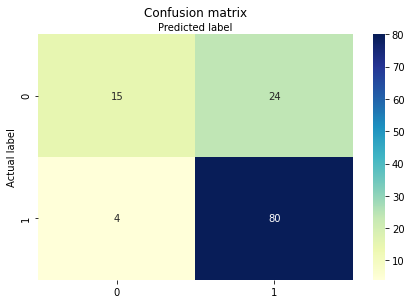

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred_naive)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_naive))
print("Precision:",metrics.precision_score(Y_test, Y_pred_naive))
print("Recall:",metrics.recall_score(Y_test, Y_pred_naive))

Accuracy: 0.7723577235772358
Precision: 0.7692307692307693
Recall: 0.9523809523809523


In [ ]:
print("f1 score:",metrics.f1_score(Y_test,Y_pred_naive))

f1 score: 0.8510638297872339


In [ ]:
import pickle

In [ ]:
pickle.dump(lr_classify,open('model.pkl','wb'))

In [ ]:
tester=pd.read_csv('/content/drive/My Drive/loan_pred/test_lAUu6dG.csv')

In [ ]:
modified_data_neww=tester[['Dependents','Gender','Married','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Property_Area','Credit_History']]
modified_data_neww.head()

,Dependents,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Credit_History
0,0,Male,Yes,Graduate,No,5720,0,110.0,360.0,Urban,1.0
1,1,Male,Yes,Graduate,No,3076,1500,126.0,360.0,Urban,1.0
2,2,Male,Yes,Graduate,No,5000,1800,208.0,360.0,Urban,1.0
3,2,Male,Yes,Graduate,No,2340,2546,100.0,360.0,Urban,NaN
4,0,Male,No,Not Graduate,No,3276,0,78.0,360.0,Urban,1.0


In [ ]:
for i in range(len(modified_data_neww['Gender'])):
  if(modified_data_neww['Gender'][i] != 'Male' and modified_data_neww['Gender'][i] !="Female"):
    modified_data_neww['Gender'][i]='Male'

for i in range(len(modified_data_neww['Married'])):
  if(modified_data_neww['Married'][i] != 'No' and modified_data_neww['Married'][i] !="Yes"):
    modified_data_neww['Married'][i]='Yes'

for i in range(len(modified_data_neww['Dependents'])):
  if(modified_data_neww['Dependents'][i] != '0' and modified_data_neww['Dependents'][i] !="1" and modified_data_neww['Dependents'][i] !="2" and modified_data_neww['Dependents'][i] !="3+"):
    modified_data_neww['Dependents'][i]='0'



for i in range(len(modified_data_neww['Dependents'])):
  if( modified_data_neww['Dependents'][i] =="3+"):
    modified_data_neww['Dependents'][i]='3'


for i in range(len(modified_data_neww['Education'])):
  if(modified_data_neww['Education'][i] != 'Graduate' and modified_data_neww['Education'][i] !="Not Graduate" ):
    modified_data_neww['Education'][i]='Graduate'

for i in range(len(modified_data_neww['Self_Employed'])):
  if(modified_data_neww['Self_Employed'][i] != 'No' and modified_data_neww['Self_Employed'][i] !="Yes" ):
    modified_data_neww['Self_Employed'][i]='Yes'


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [ ]:
enc=LabelEncoder()
modified_data_neww['Gender']=enc.fit_transform(modified_data_neww[['Gender']])
modified_data_neww['Married']=enc.fit_transform(modified_data_neww[['Married']])
modified_data_neww['Education']=enc.fit_transform(modified_data_neww[['Education']])
modified_data_neww['Self_Employed']=enc.fit_transform(modified_data_neww[['Self_Employed']])
modified_data_neww['Property_Area']=enc.fit_transform(modified_data_neww[['Property_Area']])
modified_data_neww.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the 

,Dependents,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Credit_History
0,0,1,1,0,0,5720,0,110.0,360.0,2,1.0
1,1,1,1,0,0,3076,1500,126.0,360.0,2,1.0
2,2,1,1,0,0,5000,1800,208.0,360.0,2,1.0
3,2,1,1,0,0,2340,2546,100.0,360.0,2,NaN
4,0,1,0,1,0,3276,0,78.0,360.0,2,1.0


In [ ]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer()
modified_data_newwer=pd.DataFrame(imp.fit_transform(modified_data_neww))
modified_data_newwer.shape

(367, 11)

In [ ]:
scaler=MinMaxScaler()
final_data_new=scaler.fit_transform(modified_data_newwer)

In [ ]:
submit_data=lr_classify.predict(final_data_new)

In [ ]:
submit_data

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
final_submit=pd.DataFrame({'Loan_ID':tester['Loan_ID'],'Loan_Status':submit_data})

In [ ]:
final_submit

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [ ]:
for i in range(len(final_submit['Loan_Status'])):
  if(final_submit['Loan_Status'][i]==0):
    final_submit['Loan_Status'][i]='N'
  else:
    final_submit['Loan_Status'][i]='Y'  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
final_submit

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [ ]:
final_submit.to_csv('analytivs.csv',index=False)